# Clustering Analysis on Housing Data


## Business Problem:

A house flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices.   They would like to segment homes into groups to analyze what kinds of homes there are. They would also like a model that predicts the selling price of a home.

The company has provided publicly available data from the King County Assessor's office to use for clustering and prediction.

**Data notes:**

BrickStone is the percentage of a house that is made of brick or stone.


## Objectives

The house flipping company would like you to segment the homes sold in the database and create an analytical report on the clusters describing each cluster and describing how they are different. The data has had some cleaning work to it, but you should verify that it is ready for clustering.



## Importing Libraries

In [1]:
#libraries imported in order to minimise the changing values of predictions from NN models.
import tensorflow as tf
tf.random.set_seed(321)

import numpy as np
np.random.seed(123)

#Libraries for manupulating and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing Libraries for preparing dataset into suitable machine learning format
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display = "diagram")
from sklearn.decomposition import PCA


#Importing libraries for neural network modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras

## Loading Dataset

In [2]:
Url = r"Housing Files\option_A_clustering_df.csv"
df = pd.read_csv(Url)

### Visualizing data

In [3]:
#Visualizing the first 5 rows of the dataset
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


## Data Analysis

#### Data Information

In [4]:
#Data information: number of columns, rows and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

All the columns are in numeric form, consisting of int64 dtype and float64. There are no object dtypes in this dataset.

#### Statistics Summary

In [5]:
#Veiwing the statistics summary of the dataset.
df.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,6.643497e+05,1175.502832,51.758495,349.306837,26.994134,1935.205097,595.065939,334.273463,102.417071,170.282160,...,8.271238,148.908576,4.415858,3.375607,0.387743,0.628236,1.319579,1972.183455,-122.271891,47.572471
std,2.978080e+05,446.398643,174.464172,544.632918,115.331907,764.888792,567.175862,422.825946,187.119944,239.635895,...,37.449815,201.636086,18.643753,0.947061,0.506022,0.651598,0.609963,32.905503,0.086519,0.127187
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346573,47.488749
50%,6.305500e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1967.000000,-122.291976,47.576939
75%,7.886125e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,257.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2016.000000,-122.192528,47.681099
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


There seems to be no outliers in this dataset, everything in the summary indicates that normalcy.

### Data Cleaning Process

#### Checking for null values

In [6]:
df.isnull().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

There appears to be no null values in this dataset.

#### Checking for duplicates

In [7]:
df.duplicated().sum()

29

There are 29 duplicated enteries, this is not a significant number as compared to the total number of enteries in the dataset. therefore I will drop them.

#### Dropping duplicates

In [8]:
df = df.drop_duplicates(keep ="first")

#### Confirming changes

In [9]:
df.duplicated().sum()

0

Duplicate enteries have been successfully dropped.

## Clustering Analysis

**Instantiating StandardScaler for scaling of data**

In [10]:
#Scaling of data with the use of StandardScaler
scaler =StandardScaler()
scaled_df = scaler.fit_transform(df)

All the columns are already in numeric format, so we only need to scale in preparation for clustering, there is no need for onehot encoder.

#### Clustering of Data

**Defining a cluster range**

In [11]:
cluster_range = range(2,10)
silhouettes = []
inertias = []


for clusters in cluster_range:
  kmeans = KMeans(n_clusters = clusters, random_state = 42)
  kmeans.fit(scaled_df)

  silhouettes.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)



**Plotting a simple grapth to retrieve the best cluster number**

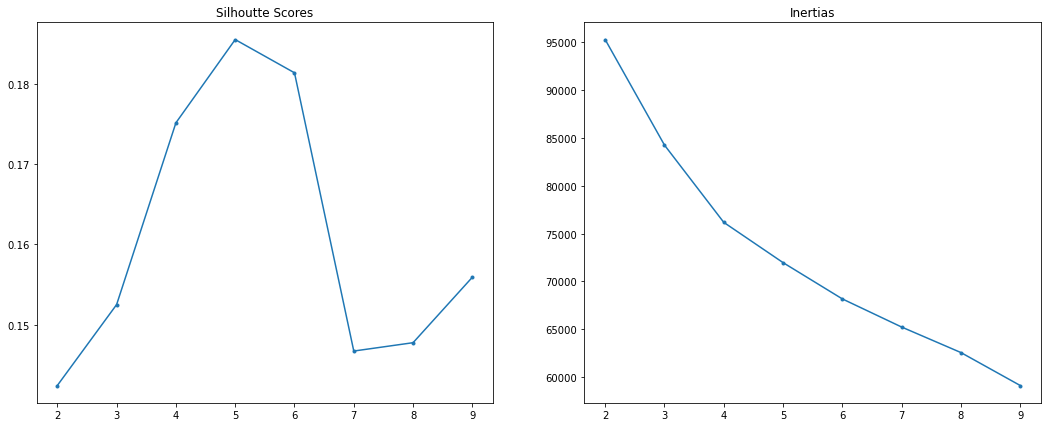

In [12]:
fig, axes =plt.subplots(1,2, figsize = (18,7))

axes[0].plot(cluster_range,silhouettes, marker =".")
axes[0].set_title('Silhoutte Scores')
axes[0].set_xticks(cluster_range)
axes[1].plot(cluster_range, inertias, marker =".")
axes[1].set_title("Inertias")
axes[1].set_xticks(cluster_range);

**Silhoutte Score:** The highest silhoutte score lies in cluster 5.

**Elbow of Inertia:** The deepest dent in the elbow of inertia lies in cluster 4.

**Decision:** The decision on the number of clusters is heavily dependant on the knowledge of the domain area. But for the purpose of this project, I will choose the silhouette scores, which indicates 5 number of clusters, because the elbow of inertia showing cluster 4 is not too obvious in the graph .

#### Instantiating Kmeans with 5 clusters

In [13]:
kmeans_best = KMeans(n_clusters = 5, random_state = 42)
kmeans_best.fit(scaled_df)


KMeans(n_clusters=5, random_state=42)

**Adding the column containing clusters to the dataframe, df["cluster]**

In [14]:
df["cluster"] = kmeans_best.labels_
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,220,0,6,0,2,1,1965,-122.196399,47.336118,2
1,474250,1390,0,0,0,2200,810,810,0,0,...,340,0,4,1,0,1,1945,-122.361913,47.509874,2
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,4,1,0,2,2019,-122.156684,47.437557,4
3,659000,660,0,540,0,1820,620,620,0,0,...,100,0,3,1,0,2,2016,-122.370252,47.565146,1
4,656500,2310,0,0,0,2310,0,0,0,440,...,320,0,3,0,0,2,1967,-122.184194,47.730389,3


### Analysis and report on clusters

**Grouping the columns by clusters**

In [15]:
cluster_groups = df.groupby("cluster", as_index = False).mean()
cluster_groups

,cluster,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,0,800569.378238,1308.393782,129.222798,104.507772,10.310881,2074.663212,1030.466321,523.937824,135.233161,...,4.766839,98.393782,92.979275,3.222798,0.352332,0.523316,1.176166,1947.637306,-122.313914,47.609316
1,1,699416.967352,562.315599,6.339782,557.292624,147.264813,1536.906892,374.007255,267.320435,102.137848,...,16.070133,299.377267,0.000000,2.756953,0.530834,0.908102,1.240629,2015.915357,-122.332590,47.616170
2,2,701105.388093,1412.025622,24.296910,82.800301,0.000000,2324.215524,1229.103994,805.243406,243.906556,...,6.053504,206.767898,1.555388,3.830445,0.403919,0.942728,1.316503,1965.336096,-122.250080,47.578438
3,3,529702.510753,1199.045699,91.982796,67.500000,0.000000,1435.270430,347.100538,81.279570,25.956989,...,7.876344,67.243548,0.843011,3.027957,0.207527,0.286022,1.096237,1947.485484,-122.283790,47.554594
4,4,872449.639831,1375.221751,30.889831,1399.980226,9.307910,2962.275424,208.494350,147.621469,28.895480,...,5.070621,90.925141,0.360169,4.227401,0.673729,0.632768,2.048023,2003.652542,-122.197298,47.546035


#### Differences between Clusters



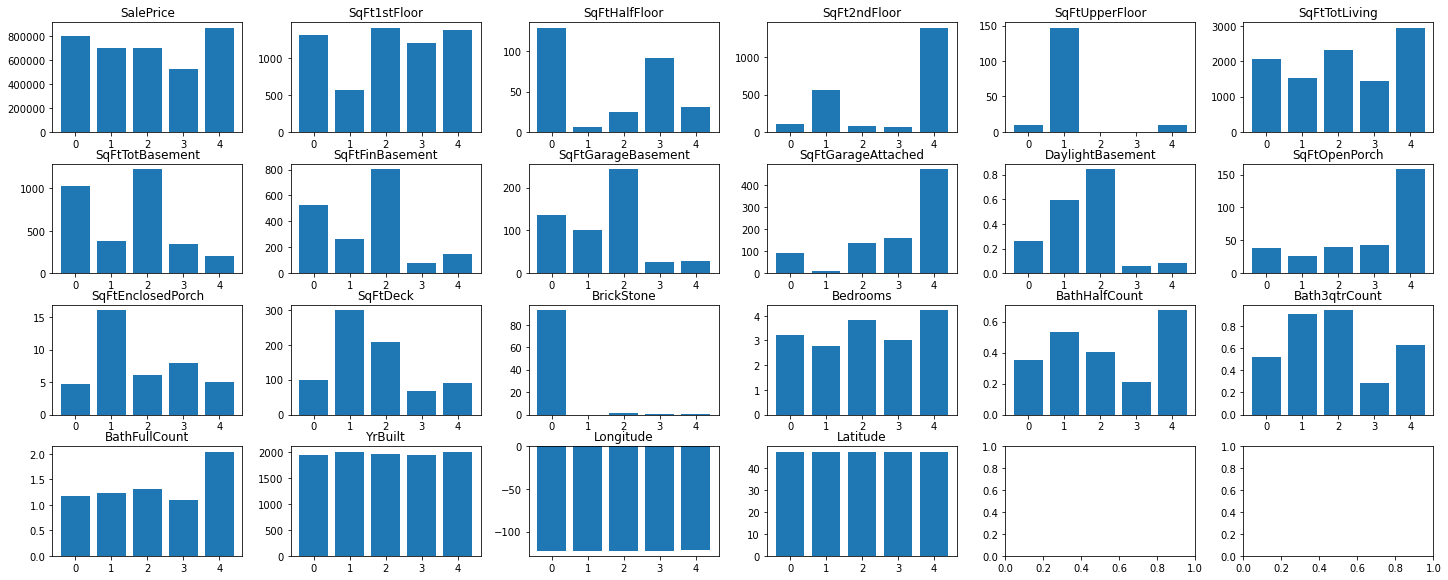

In [16]:
#Exlpanaory visualization on variations between clusters
fig, axes =plt.subplots(4,6, figsize = (20,8))
fig.tight_layout()
axes = axes.ravel()

for i, column in enumerate(cluster_groups.columns[1:]):
                        axes[i].bar(cluster_groups["cluster"], cluster_groups[column])
                        axes[i].set_title(column)
                      

In [17]:
cluster_groups["cluster"]

0    0
1    1
2    2
3    3
4    4
Name: cluster, dtype: int64

### Analysing Clusters

**Cluster 0**

Houses in this cluster have an average of the following:
*   Sales price:            $800,000
*   First floor size:       over 1500 sqft.
*   Half floor size:        about 150sqft.
*   2nd floor size :        less than 10 sqft. 
*   Upper floor:            less than 10 sqft
*   Total living space:     2000 sqft.
*   Basement size:          About 1000 sqft.
*   Finished basement size: 500 sqft.
*   Garage basement:        140 sqft
*   Attached garage:        About 90 sqft
*   Daylight basement:      about 0.3
*   Open porch:             40sqft
*   Enclosed porch:         less than 5 sqft
*   Deck:                   About 100sqft
*   Brickstone:             About 100%
*   Bedrooms:               3
*   Bathhalfcount:          less than 0.4
*   Bath3qtr count:         About 0.5
*   Bathfullcount:          1
*   Year:                   2000.
*   Longitude:              Above 0 
*   Latitude:               50




**Cluster 1**

Houses in this cluster have an average of the following:
*   Sales price:            $700,000
*   First floor size:       About 500 sqft.
*   Half floor size:        less than 10sqft.
*   2nd floor size :        About 500 sqft. 
*   Upper floor:            About 140 sqft
*   Total living space:     About 1500sqft.
*   Basement size:          about 400 sqft.
*   Finished basement size: 250 sqft.
*   Garage basement:        100 sqft
*   Attached garage:        About 5sqft
*   Daylight basement:      about 0.6
*   Open porch:             30sqft
*   Enclosed porch:         Over 15 sqft
*   Deck:                   About 300sqft
*   Brickstone:             None
*   Bedrooms:               2.5
*   Bathhalfcount:          Less than 0.5
*   Bath3qtr count:         1
*   Bathfullcount:          1
*   Year:                   2000
*   Longitude:              Above 0 
*   Latitude:               50

**Cluster 2**

Houses in this cluster have an average of the following:
*   Sales price:            $700,000
*   First floor size:       over 1500 sqft.
*   Half floor size:        about 20sqft.
*   2nd floor size :        less than 10 sqft. 
*   Upper floor:            none
*   Total living space:     2500sqft.
*   Basement size:          about 1500 sqft.
*   Finished basement size: 800 sqft.
*   Garage basement:        300 sqft
*   Attached garage:        less than 130sqft
*   Daylight basement:      about 0.8
*   Open porch:             40 sqft
*   Enclosed porch:         6 sqft
*   Deck:                   About 200 sqft
*   Brickstone:             Less than 5%
*   Bedrooms:               4.
*   Bathhalfcount:          About 0.4
*   Bath3qtr count:         About 1
*   Bathfullcount:          1.4
*   Year:                   2000.
*   Longitude:              Above 0 
*   Latitude:               50


**Cluster 3**

Houses in this cluster have an average of the following:
*   Sales price:            $500,000
*   First floor size:       1300 sqft.
*   Half floor size:        about 80sqft.
*   2nd floor size :        less than 10 sqft. 
*   Upper floor:            none
*   Total living space:     2500sqft.
*   Basement size:          1400 sqft.
*   Finished basement size: 30 sqft.
*   Garage basement:        20 sqft
*   Attached garage:        About 150sqft
*   Daylight basement:      about 0.05
*   Open porch:             40 sqft
*   Enclosed porch:         7.5 sqft
*   Deck:                   50 sqft
*   Brickstone:             Less than 5%
*   Bedrooms:               3
*   Bathhalfcount:          About 0.3
*   Bath3qtr count:         About 0.3
*   Bathfullcount:          1
*   Year:                   2000.
*   Longitude:              Above 0 
*   Latitude:               50

**Cluster 4**

Houses in this cluster have an average of the following:
*   Sales price:            Over $800,000
*   First floor size:       over 1500 sqft.
*   Half floor size:        about 30sqft.
*   2nd floor size :        Over 1500 sqft. 
*   Upper floor:            Less than 10%
*   Total living space:     Over 3500 sqft.
*   Basement size:          about 200 sqft.
*   Finished basement size: About 150 sqft.
*   Garage basement:        20 sqft
*   Attached garage:        About 500
*   Daylight basement:      about 0.08
*   Open porch:             Over 150 sqft
*   Enclosed porch:         5 sqft
*   Deck:                   About 100 sqft
*   Brickstone:             Less than 5%
*   Bedrooms:               More than 4.
*   Bathhalfcount:          More than 0.6
*   Bath3qtr count:         About 0.6
*   Bathfullcount:          More than 2
*   Year:                   2000.
*   Longitude:              Above 0 
*   Latitude:               50

### Visualizing the relations between clusters and the sales price

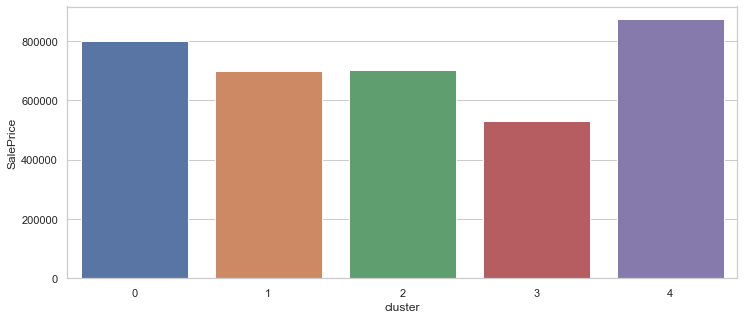

In [18]:
plt.rcParams ["figure.figsize"] =(12,5)
sns.set_theme(style = "whitegrid")
ax =sns.barplot(y =cluster_groups["SalePrice"], x =cluster_groups["cluster"], data =df)

### Report on visualization
**The graph above indicates that houses in cluster 4 are the most expensive, with an average sales price of about 900,000 dollars. Houses in cluster 0 are the next most expensive set, with average sales price of about 800,000 dollars. Houses in cluster 1 and 2 have the same average sales price of about 700,000 dollars. The least expensive set of houses are in cluster 3 with an average sales price of about 500,000 dollars.**



---


# Phase 2:
> ##  Regression Modeling

## Business Problem:

The house flipping company has provided new data about when the homes were sold and what businesses are nearby.  This new data has created a very large number of columns as the businesses, months sold, and years sold are all one-hot encoded.  

## Objectives
They would like this new dataset to be used and create a deep learning model that predicts the likely sale price for a new home coming to market.

Note: SalePrice is the target variable

### Loading of Dataset**

In [19]:
Url = "Housing Files\option_A_modeling_df.csv"

In [20]:
df1 = pd.read_csv(Url)

**Display of first 5 rows of dataset**

In [21]:
df1.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


### Preprocessing stage**

**Assigning the target vector and independent variables**

In [22]:
X =df1.drop(columns = ["SalePrice"])
y = df1["SalePrice"]
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state = 42)

**Instantiating Column Selector**

In [23]:
#The dataset contains numeric columns which needs to be scaled.
num_cols = make_column_selector(dtype_include = "number")


**Instantiating StandardScaler**

In [24]:
#scaler 
scaler =StandardScaler()

**Instantiating tuples to contain selected column**

In [25]:
#Housing the scaler and the numeric columns in a tuple for further processing
num_tuple =(scaler, num_cols)

**Instatiating transformer**

In [26]:
#Initiating scaling of numeric columns
Transformed = make_column_transformer(num_tuple, remainder ="passthrough")
Transformed

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020367274D88>)])

**Fitting transformer on X_train**

In [27]:
#Fitting on the train set and transforming both training and testing sets.
X_train_transformed = Transformed.fit_transform(X_train)
X_test_transformed = Transformed.transform(X_test)

#**Application of PCA (Principal Component Analysis), for feature reduction**


In [28]:
#Instantiating PCA
pca = PCA()
pca.fit(X_train_transformed)

PCA()

**Visualizing the proportion of explained variance**

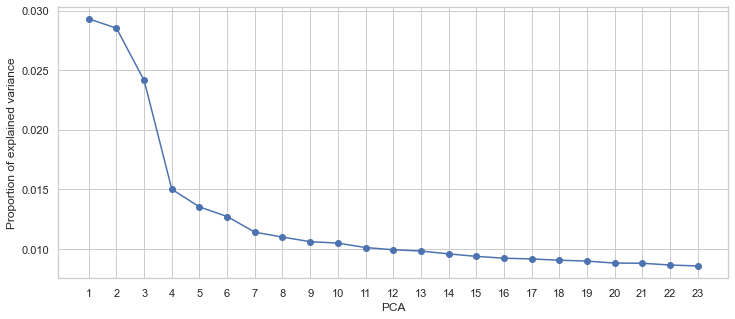

In [29]:
plt.plot(range(1,24), pca.explained_variance_ratio_[:23], marker = "o")
plt.xlabel("PCA")
plt.ylabel("Proportion of explained variance")
plt.xticks(ticks = range(1,24));

From the above graph, we can clearly see that the deep slope of the curve lies on the number 4. That is where the slope makes a significant drop, and therefore I will use 4 as the n_components.

**Applying the appropraite number of components derived from graph**

Instantiating PCA with n_component =4

In [30]:
pca1 =PCA (n_components =4)
X_train_pca = pca1.fit_transform(X_train_transformed )
X_test_pca = pca1.transform(X_test_transformed )

**Differences between the original X_train set and the PCA processed X_train set**

In [31]:
#Subtracting the shape of pca processed X train from the shape of the original X train to get the difference.
differences = X_train.shape[1] - X_train_pca.shape[1]
print(f'There are {differences} less features after the application of pca')


There are 166 less features after the application of pca


**Variance retained after the application of PCA**

In [32]:
variance = pca1.explained_variance_ratio_.sum()
print(f'pca explained {variance:.1f}% of the variance from the original data')

pca explained 0.1% of the variance from the original data




## Neural Network Model

**Defining functions to be used in building the model**

In [33]:
#Function to plot graph for visualising the history of model performance
def hist_plot (history, metrics = None):

  fig, axes =plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label = "test")
  axes[0].set_title("loss")
  axes[0].legend()

  if metrics:
     axes[1].plot(history.history[metrics], label = "train")
     axes[1].plot(history.history['val_'+metrics], label = "test")
     axes[1].set_title(metrics)
     axes[1].legend()

  plt.show()




#Function to format numbers by inserting commas.
def comma(number):
    return ("{:,}"). format(number)



#Displaying the training progress by printing a single - for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs):
   if epochs %100 ==0: print(" ")
   print(".", end =" ")


## Building of Model

In [34]:
input_shape = X_train_pca.shape[1]

### Base Model

**Instantiating Model**

For optimized model performance, I have decided to build my initial model with an input layer, 1 hidden layer and 1 output layer as this is a regression model. It will also contain an "adam" optimizer, and "mse" as the evaluation metric.

In [35]:
Reg_model = Sequential(name = "Regression_NN")

Reg_model.add(Dense(64, activation = "relu", input_dim = input_shape))   
Reg_model.add(Dense(64, activation = "relu"))
Reg_model.add(Dense(1))        

Reg_model.compile(loss ="mse", optimizer = 'adam', metrics= ["mse", "mae"])  

**Summary of model**

In [36]:
Reg_model.summary()

Model: "Regression_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


**Model Inspection**

In [37]:
#Trying out the model on a batch of 10 examples from the trainind data and calling .predict on it.
exp_batch = X_train_pca[:10]
exp_result= Reg_model.predict(exp_batch)
exp_result

array([[-0.48040503],
       [-0.20993513],
       [-0.20445572],
       [-0.39339203],
       [ 0.15322462],
       [-0.51273125],
       [ 0.38115793],
       [-0.4819069 ],
       [-0.03016806],
       [ 0.36850283]], dtype=float32)

The model seems to be working and it produces a result of the expected shape and type.

**Training and fitting model on training set**

In [38]:
#Training the model on a starting point of 50 epochs and recording the validation scores in the history object
history = Reg_model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs = 50,verbose = 0 ,callbacks = [PrintDot()])

 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**Visualizing model performance on test set and train set.**

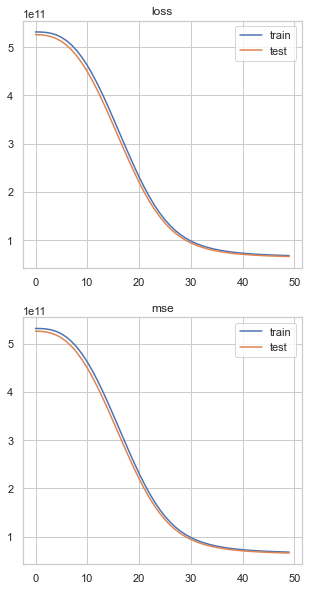

In [39]:
hist_plot(history, metrics ="mse")

**Predictions**

In [40]:
#making predictions on testing set
Train_preds =np.rint(Reg_model.predict(X_train_pca))
Test_preds = np.rint(Reg_model.predict(X_test_pca))

**Evaluating Model Performnace**

In [41]:
test_loss = Reg_model.evaluate(X_test_pca, y_test)
test_loss

39/39 [==============================] - 0s 3ms/step - loss: 65814769664.0000 - mse: 65814769664.0000 - mae: 187237.6406


[65814769664.0, 65814769664.0, 187237.640625]

In [42]:
mse_train = mean_squared_error(y_train, Train_preds)
mse_test =mean_squared_error(y_test, Test_preds)

mae_train = mean_absolute_error(y_train, Train_preds)
mae_test = mean_absolute_error(y_test, Test_preds)

print(f'Train set (MSE) evaluation score:\nmse: Train set: {comma(mse_train)}          Test set:  {comma(mse_test)}\n')
print(f'Test set (MAE) evaluation score:\nmae:  Train set: {comma(mae_train)}           Test set:  {comma(mae_test)}')


Train set (MSE) evaluation score:
mse: Train set: 67,567,841,305.984604          Test set:  65,814,768,580.07207

Test set (MAE) evaluation score:
mae:  Train set: 190,802.33144246353           Test set:  187,237.5991902834


**Conclusion Base Model**

The model performed relatively well, but I will still go ahead and tune it to see if it can perform even better. I will begin by adding a dropout layer and increasing the number of epoch to 100, to see how well it will improve.

### Second version of Model

**Applying dropout layer and inceasing epoch to 100**

In [43]:
#Adding dropout layers to the first and second layers.
Reg_model1 = Sequential(name = "Regression_NN")

Reg_model1.add(Dense(64, activation = "relu", input_dim = input_shape))  
Reg_model1.add(Dropout(.3))
Reg_model1.add(Dense(64, activation = "relu"))
Reg_model1.add(Dropout(.3))
Reg_model1.add(Dense(1))

Reg_model1.compile(loss ="mse", optimizer = 'adam', metrics= "mse")

**Training and fitting model on training set**

In [44]:
#Training the model on 100 epochs and recording the validation scores in the history object
history1 = Reg_model1.fit(X_test_pca, y_test,  epochs = 100,  validation_data = (X_test_pca, y_test), verbose =0, callbacks = [PrintDot()])


 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**Visualizing model performance on test set and train set.**

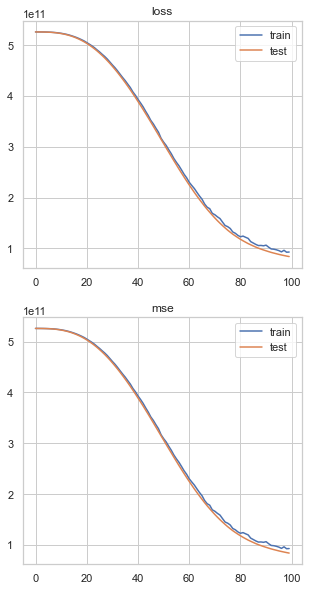

In [45]:
hist_plot(history1, metrics ="mse" )

**Predictions**

In [46]:
#making predictions on testing set
Train_preds1 =np.rint(Reg_model1.predict(X_train_pca))
Test_preds1 = np.rint(Reg_model1.predict(X_test_pca))

**Evaluating model performance**

In [47]:
mse_train1 = mean_squared_error(y_train, Train_preds1)
mse_test1 =mean_squared_error(y_test, Test_preds1)

mae_train1 = mean_absolute_error(y_train, Train_preds1)
mae_test1 = mean_absolute_error(y_test, Test_preds1)

print(f'Train set (MSE) evaluation score:\nmse: Train set: {comma(mse_train1)}          Test set:  {comma(mse_test1)}\n')
print(f'Test set (MAE) evaluation score:\nmae:  Train set: {comma(mae_train1)}           Test set:  {comma(mae_test1)}')


Train set (MSE) evaluation score:
mse: Train set: 85,904,000,461.32037          Test set:  83,666,618,233.57895

Test set (MAE) evaluation score:
mae:  Train set: 218,330.34629929767           Test set:  218,178.25910931174


The above graph shows that the model has **not** improved upon the adding of a dropout layer and increasing the epoch to 100, from 50. The mse and mae score has significantly increased which is not a good sign, so I will go ahead and tune it further by applying an early stopping callback.. 

### Third version of Model

**Applying early stopping**

In [48]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 10)
Reg_model2 = Sequential(name = "Regression_NN")

Reg_model2.add(Dense(64, activation = "relu", input_dim = input_shape))  
Reg_model2.add(Dense(64, activation = "relu"))
Reg_model2.add(Dense(1))

Reg_model2.compile(loss ="mse", optimizer = 'adam', metrics= "mse")

**Training and fitting model on training set**

In [ ]:
#Training the model on 100 epochs, a callback = earlystopping and recording the validation scores in the history object
history2 = Reg_model2.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs = 100,verbose = 0 ,callbacks = [early_stop, PrintDot()])

 
. . . . . . . . . . . . . . . . . . . . . . 

**Visualizing model performance on test set and train set.**

In [ ]:
hist_plot(history2, metrics ="mse")

**Predictions**

In [ ]:
#making predictions on testing set
Train_preds2 =np.rint(Reg_model2.predict(X_train_pca))
Test_preds2 = np.rint(Reg_model2.predict(X_test_pca))

**Evaluation of Model Performance**

In [ ]:
mse_train2 = mean_squared_error(y_train, Train_preds2)
mse_test2 =mean_squared_error(y_test, Test_preds2)

mae_train2 = mean_absolute_error(y_train, Train_preds2)
mae_test2 = mean_absolute_error(y_test, Test_preds2)

print(f'Train set (MSE) evaluation score:\nmse: Train set: {comma(mse_train2)}          Test set:  {comma(mse_test2)}\n')
print(f'Test set (MAE) evaluation score:\nmae:  Train set: {comma(mae_train2)}           Test set:  {comma(mae_test2)}')


**Conclusion on third version of the model**

The curve from the graph seems perfect. The performance of both the training and the testing set is very good. The mse score and the mae score of both test and train set is considerably lower than the other two version of the model.

## Final Conclusion

**Upon carefull consideration on the performance of model on test and train set , as well as the mse and mae score, I will go with the third version of model, which from the graph, did well on both train and test set and had a low mse and mae score than all the other versions. With a high prediction accuary and low mae and mse, the model will surely predict the accurate sales price for the company.**

